In [85]:
#imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import math
from sklearn.inspection import plot_partial_dependence
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [184]:
#loads csv file as pandas dataframe
df = pd.read_csv ('Life_Expectancy_Data.csv')
df.head()
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [185]:

df = df[df['Year'] == 2015]
df = df.drop(['Country', 'Year', 'Status'], axis=1)

#, 'infant deaths', 'percentage expenditure', 'Total expenditure'

names = df.columns
scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=names)

df_y = df['Life expectancy '].to_frame()
df_y = df_y.to_numpy()

df_x = scaled_df.drop(['Life expectancy '], axis=1)
print(df_x.columns)
df_x = df_x.to_numpy()


avg_vec = []
for i in range(0, len(df_x[0])):
    avg = 0
    count = 0
    for j in range(0, len(df_x)):
        if (math.isnan(df_x[j][i])):
            count = count + 1
        else:
            avg = avg + df_x[j][i]
    avg_final = avg / (len(df_x) - count)
    avg_vec.append(avg_final)
for i in range(0, len(df_x[0])):
    for j in range(0, len(df_x)):
         if (math.isnan(df_x[j][i])):
                df_x[j][i] = avg_vec[i]
                

        


Index(['Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure',
       'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio',
       'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')


In [88]:
X_train, X_test, y_train, y_test =  train_test_split(df_x,df_y,test_size = 0.2, random_state= 0)

mse: [12.23790144]
intercept: [72.44794521]
coefficient: [[-3.24249273  0.16261729  0.05257154 -2.05921345 -0.29769928 -0.19208819
   0.70885541 -1.28980576 -1.07041896  0.32022931  0.02730874]]
score: 0.8184642150340915
[[72.7]
 [69.8]
 [53.1]
 [58.3]
 [61.8]
 [62.3]
 [82.8]
 [67.5]
 [74.4]
 [68.3]
 [76.3]
 [65.8]
 [74.1]
 [82.3]
 [73.5]
 [57.3]
 [54.5]
 [69.4]
 [82.7]
 [58.9]
 [74.6]
 [64.8]
 [63.5]
 [76.7]
 [76.4]
 [71.9]
 [74.6]
 [65.7]
 [59.8]
 [65.7]
 [57.6]
 [62.4]
 [59.6]
 [61.1]
 [77.1]
 [69.7]
 [81.5]]
[[74.05884665]
 [68.35389343]
 [53.28472118]
 [58.33034877]
 [67.74207674]
 [60.43584315]
 [85.52841896]
 [73.61445256]
 [75.15408111]
 [60.05880193]
 [79.40059163]
 [66.57486493]
 [74.48097254]
 [76.02470032]
 [71.8548281 ]
 [52.10028204]
 [54.83102293]
 [69.88632387]
 [80.64379935]
 [55.28620306]
 [71.03635787]
 [61.7005627 ]
 [65.73652254]
 [80.69190431]
 [79.0102806 ]
 [66.34431368]
 [77.14861907]
 [62.42577871]
 [66.07624374]
 [67.75369943]
 [51.85748227]
 [66.18030938]
 [

Text(0, 0.5, 'Predictions')

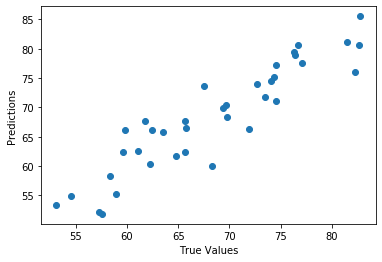

In [128]:
model = LinearRegression().fit(X_train, y_train)
predictions = model.predict(X_test)
#print(predictions[1])
#print(y_test[1])
#find MSE squared error


count = 0
for i in range(0, len(predictions)):
    count = count + (predictions[i] - y_test[i])**2
mse = count / len(predictions)
score = model.score(X_test, y_test)

print('mse:', mse)
print('intercept:', model.intercept_)
print('coefficient:', model.coef_)
print('score:', model.score(X_test, y_test))
print(y_test)
print(predictions)
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

#fix this issue by replacing missing values with the mean of the columns

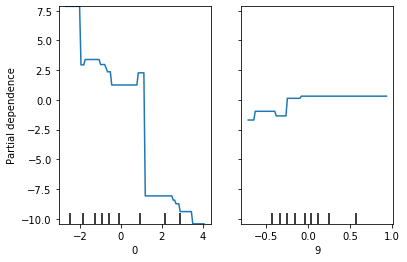

In [129]:
clf = GradientBoostingRegressor(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, y_train.ravel())
features = [0, 9]
print(plot_partial_dependence(clf, X_train, features))

In [ ]:
#1, 3, 9, (4 also)
#Use 0, 4, 15, maybe 17

mse: [7.51351394]
intercept: [71.21438356]
coefficient: [[-2.86080431  1.49824935 -0.79351668  0.96667815  0.59054316 -1.58204408
   0.72693552  0.05387963 -0.01494894  1.2937395   1.01924317]]
score: 0.8009649389843843
Shape of components:  (11, 18)
Explained variance:  [5.82563818 3.07592983 2.02162657 1.81700685 1.54977252 1.00709552
 0.8650111  0.66311257 0.61368536 0.50702512 0.36403796]


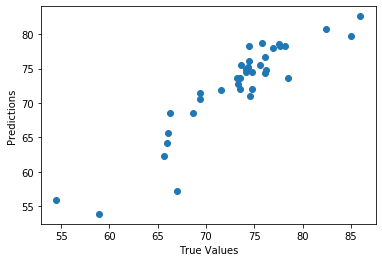

In [182]:
from sklearn.decomposition import PCA

X_train, X_test, y_train, y_test =  train_test_split(df_x,df_y,test_size = 0.2)


pca = PCA(.95)
pca = pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

model = LinearRegression().fit(X_train, y_train)
predictions = model.predict(X_test)
#print(predictions[1])
#print(y_test[1])
#find MSE squared error

count = 0
for i in range(0, len(predictions)):
    count = count + (predictions[i] - y_test[i])**2
mse = count / len(predictions)
score = model.score(X_test, y_test)

print('mse:', mse)
print('intercept:', model.intercept_)
print('coefficient:', model.coef_)
print('score:', model.score(X_test, y_test))

plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
#fix this issue by replacing missing values with the mean of the columns

print('Shape of components: ', pca.components_.shape)
print('Explained variance: ', pca.explained_variance_)

Train on 146 samples, validate on 37 samples
Epoch 1/1
146/146 [==============================] - 0s 2ms/step - loss: 1.5104 - mse: 1.5104 - val_loss: 0.6618 - val_mse: 0.6618
MSE : 0.6618135869503021
Feature 0: Adult Mortality
Feature 1: infant deaths
Feature 2: Alcohol
Feature 3: percentage expenditure
Feature 4: Hepatitis B
Feature 5: Measles 
Feature 6:  BMI 
Feature 7: under-five deaths 
Feature 8: Polio
Feature 9: Total expenditure
Feature 10: Diphtheria 
Feature 11:  HIV/AIDS
Feature 12: GDP
Feature 13: Population
Feature 14:  thinness  1-19 years
Feature 15:  thinness 5-9 years
Feature 16: Income composition of resources
Feature 17: Schooling


Weight,Feature
0.1372 ± 0.0614,x10
0.1332 ± 0.0391,x0
0.1187 ± 0.0312,x12
0.0354 ± 0.0178,x7
0.0336 ± 0.0332,x16
0.0320 ± 0.0071,x15
0.0281 ± 0.0663,x5
0.0258 ± 0.0272,x17
0.0186 ± 0.0752,x8
0.0136 ± 0.0378,x14


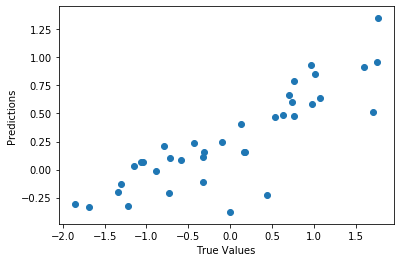

In [207]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from eli5.sklearn import PermutationImportance
from eli5 import show_weights

X_train, X_test, y_train, y_test =  train_test_split(df_x,df_y,test_size = 0.2, random_state= 0)
X_train = StandardScaler().fit_transform(X_train)
y_train = StandardScaler().fit_transform(y_train)
model = Sequential()

# input layer
model.add(Dense(25, activation="relu", input_shape=(18,)))

# hidden layers
model.add(Dropout(0.2))
model.add(Dense(25, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(25, activation="relu"))

# output layer
model.add(Dense(1, activation="linear"))

model.compile(
    optimizer="adam",
    loss="mse",
    metrics=["mse"])

X_test = StandardScaler().fit_transform(X_test)
y_test = StandardScaler().fit_transform(y_test)

results = model.fit(
    X_train,
    y_train,
    batch_size=5,
    validation_data=(X_test, y_test))

plt.scatter(y_test, preds)
plt.xlabel('True Values')
plt.ylabel('Predictions')

print('MSE :', np.mean(results.history['val_loss']))

bigperm = PermutationImportance(model, scoring='neg_mean_squared_error', random_state=0).fit(X_test, y_test)
for i in range(len(names)):
    print('Feature %d: %s' % (i, names[i]))
show_weights(bigperm)
